In [6]:
import os

cache_dir = os.path.expanduser("~/.cache/clip")

print(f"CLIP 模型文件的缓存目录: {cache_dir}")

if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
    print(f"缓存目录已创建: {cache_dir}")
else:
    print(f"缓存目录已存在: {cache_dir}")

cached_files = os.listdir(cache_dir)
print(f"缓存目录中的文件: {cached_files}")


CLIP 模型文件的缓存目录: C:\Users\王震/.cache/clip
缓存目录已存在: C:\Users\王震/.cache/clip
缓存目录中的文件: ['ViT-B-32.pt']


In [8]:
import os

new_cache_dir = "C:\\clip_models"
os.makedirs(new_cache_dir, exist_ok=True)
print(f"New cache directory created at: {new_cache_dir}")


New cache directory created at: C:\clip_models


In [9]:
import shutil

old_model_path = os.path.expanduser("~/.cache/clip/ViT-B-32.pt")
new_model_path = os.path.join(new_cache_dir, "ViT-B-32.pt")

shutil.move(old_model_path, new_model_path)
print(f"Model moved to: {new_model_path}")


Model moved to: C:\clip_models\ViT-B-32.pt


e:\大三下课程\python\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\王震\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Text: She seems very happy in the picture, and you want to know what is behind the smile.
Similarity: 0.0059

Text: This woman has really knotty hands which makes her look like she has arthritis.
Similarity: 0.0131

Text: When looking at this woman, I am filled with curiosity about what she is thinking about with her elbow on the table and a very emotionless face.
Similarity: 0.3110

Text: A woman looking at ease, peaceful, and satisfied amongst her books makes me feel content.
Similarity: 0.0496

Text: She looks like a lady from that past that might have been a teacher (books). She looks tired and I wondered how hard it must have been for them back then.
Similarity: 0.6204



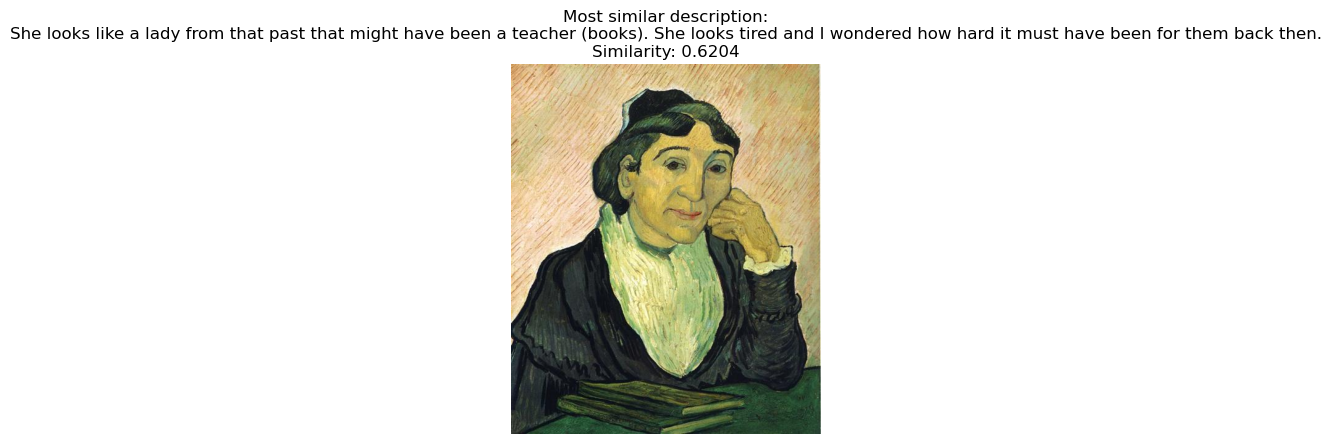

In [18]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import matplotlib.pyplot as plt

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image_url = "https://uploads4.wikiart.org/images/vincent-van-gogh/portrait-of-madame-ginoux-l-arlesienne-1890.jpg!Large.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

texts = [
    "She seems very happy in the picture, and you want to know what is behind the smile.",
    "This woman has really knotty hands which makes her look like she has arthritis.",
    "When looking at this woman, I am filled with curiosity about what she is thinking about with her elbow on the table and a very emotionless face.",
    "A woman looking at ease, peaceful, and satisfied amongst her books makes me feel content.",
    "She looks like a lady from that past that might have been a teacher (books). She looks tired and I wondered how hard it must have been for them back then."
]

inputs = processor(text=texts, images=img, return_tensors="pt", padding=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

similarities = probs.cpu().numpy()[0]
for i, text in enumerate(texts):
    print(f"Text: {text}")
    print(f"Similarity: {similarities[i]:.4f}")
    print()

def visualize_results(image, texts, similarities):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')

    max_idx = similarities.argmax()
    plt.title(f"Most similar description:\n{texts[max_idx]}\nSimilarity: {similarities[max_idx]:.4f}")
    plt.show()

visualize_results(img, texts, similarities)


Text: She seems very happy in the picture, and you want to know what is behind the smile.
Similarity: 0.0059

Text: This woman has really knotty hands which makes her look like she has arthritis.
Similarity: 0.0131

Text: When looking at this woman, I am filled with curiosity about what she is thinking about with her elbow on the table and a very emotionless face.
Similarity: 0.3110

Text: A woman looking at ease, peaceful, and satisfied amongst her books makes me feel content.
Similarity: 0.0496

Text: She looks like a lady from that past that might have been a teacher (books). She looks tired and I wondered how hard it must have been for them back then.
Similarity: 0.6204



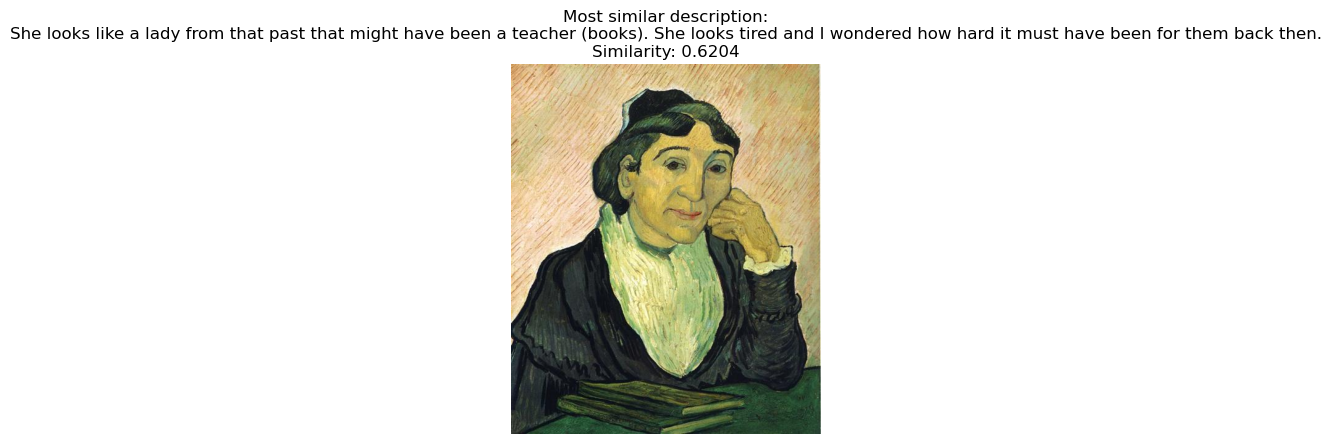

In [22]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Loading the model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Download and load images
image_url = "https://uploads4.wikiart.org/images/vincent-van-gogh/portrait-of-madame-ginoux-l-arlesienne-1890.jpg!Large.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

texts = [
    "She seems very happy in the picture, and you want to know what is behind the smile.",
    "This woman has really knotty hands which makes her look like she has arthritis.",
    "When looking at this woman, I am filled with curiosity about what she is thinking about with her elbow on the table and a very emotionless face.",
    "A woman looking at ease, peaceful, and satisfied amongst her books makes me feel content.",
    "She looks like a lady from that past that might have been a teacher (books). She looks tired and I wondered how hard it must have been for them back then."
]

inputs = processor(text=texts, images=img, return_tensors="pt", padding=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

# Generate feature vectors for images and text
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)  # Calculate similarity

# Print similarity results
similarities = probs.cpu().numpy()[0]
for i, text in enumerate(texts):
    print(f"Text: {text}")
    print(f"Similarity: {similarities[i]:.4f}")
    print()

def visualize_results(image, texts, similarities):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')

    max_idx = similarities.argmax()
    plt.title(f"Most similar description:\n{texts[max_idx]}\nSimilarity: {similarities[max_idx]:.4f}")
    plt.show()

visualize_results(img, texts, similarities)


Text: She seems very happy in the picture, and you want to know what is behind the smile.
Similarity: 0.0059

Text: This woman has really knotty hands which makes her look like she has arthritis.
Similarity: 0.0131

Text: When looking at this woman, I am filled with curiosity about what she is thinking about with her elbow on the table and a very emotionless face.
Similarity: 0.3110

Text: A woman looking at ease, peaceful, and satisfied amongst her books makes me feel content.
Similarity: 0.0496

Text: She looks like a lady from that past that might have been a teacher (books). She looks tired and I wondered how hard it must have been for them back then.
Similarity: 0.6204



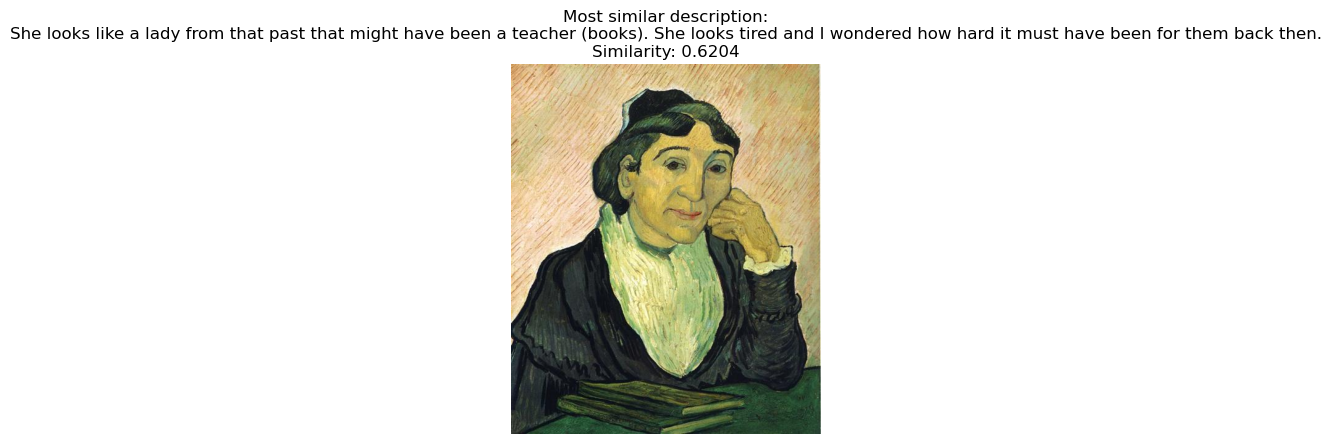

In [27]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image_url = "https://uploads4.wikiart.org/images/vincent-van-gogh/portrait-of-madame-ginoux-l-arlesienne-1890.jpg!Large.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

texts = [
    "She seems very happy in the picture, and you want to know what is behind the smile.",
    "This woman has really knotty hands which makes her look like she has arthritis.",
    "When looking at this woman, I am filled with curiosity about what she is thinking about with her elbow on the table and a very emotionless face.",
    "A woman looking at ease, peaceful, and satisfied amongst her books makes me feel content.",
    "She looks like a lady from that past that might have been a teacher (books). She looks tired and I wondered how hard it must have been for them back then."
]

inputs = processor(text=texts, images=img, return_tensors="pt", padding=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1) 

similarities = probs.cpu().numpy()[0]
for i, text in enumerate(texts):
    print(f"Text: {text}")
    print(f"Similarity: {similarities[i]:.4f}")
    print()

def visualize_results(image, texts, similarities):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    
    max_idx = similarities.argmax()
    plt.title(f"Most similar description:\n{texts[max_idx]}\nSimilarity: {similarities[max_idx]:.4f}")
    plt.show()

visualize_results(img, texts, similarities)


Emotion: The woman seems to be in deep thought about something. The individual pictured seems quite content with their place in the world and I like their facial expression. The woman seems attentive and ready to listen. This artwork conveys a feeling of anger.
Similarity: 0.1059

Emotion: The woman seems to be in deep thought about something. The individual pictured seems quite content with their place in the world and I like their facial expression. The woman seems attentive and ready to listen. This artwork conveys a feeling of disgust.
Similarity: 0.0868

Emotion: The woman seems to be in deep thought about something. The individual pictured seems quite content with their place in the world and I like their facial expression. The woman seems attentive and ready to listen. This artwork conveys a feeling of fear.
Similarity: 0.0829

Emotion: The woman seems to be in deep thought about something. The individual pictured seems quite content with their place in the world and I like thei

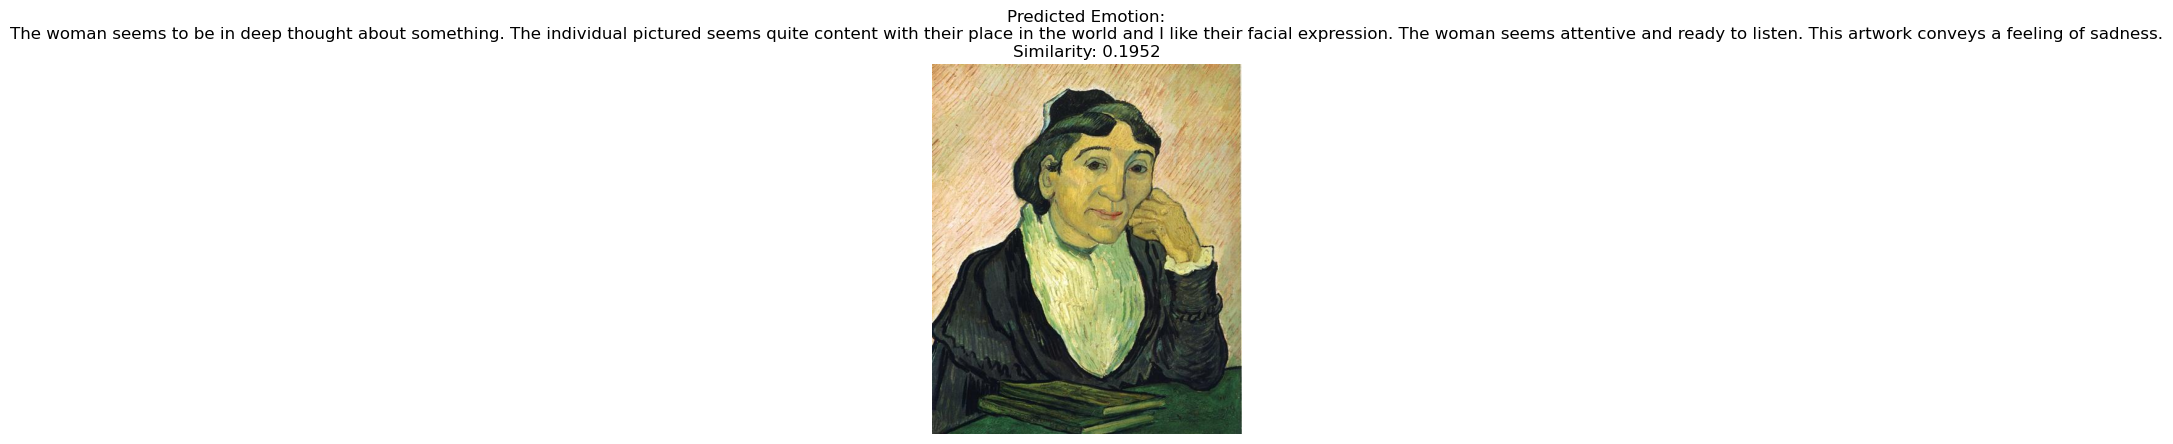

In [3]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image_url = "https://uploads4.wikiart.org/images/vincent-van-gogh/portrait-of-madame-ginoux-l-arlesienne-1890.jpg!Large.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

emotions = [
    "This artwork conveys a feeling of anger.",
    "This artwork conveys a feeling of disgust.",
    "This artwork conveys a feeling of fear.",
    "This artwork conveys a feeling of sadness.",
    "This artwork conveys a feeling of amusement.",
    "This artwork conveys a feeling of awe.",
    "This artwork conveys a feeling of contentment.",
    "This artwork conveys a feeling of excitement.",
]

inputs = processor(text=emotions, images=img, return_tensors="pt", padding=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

# Generate feature vectors for images and emotion descriptions
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1) 

# Print similarity results
similarities = probs.cpu().numpy()[0]
for i, emotion in enumerate(emotions):
    print(f"Emotion: {emotion}")
    print(f"Similarity: {similarities[i]:.4f}")
    print()

# Get the most similar sentiment description
max_idx = similarities.argmax()
predicted_emotion = emotions[max_idx]
print(f"The predicted emotion is: {predicted_emotion}")

# Visualize images and their most similar sentiment descriptions
def visualize_results(image, emotion, similarity):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    
    plt.title(f"Predicted Emotion:\n{emotion}\nSimilarity: {similarity:.4f}")
    plt.show()

visualize_results(img, predicted_emotion, similarities[max_idx])


Emotion: This artwork conveys a feeling of anger.
Similarity: 0.0351

Emotion: This artwork conveys a feeling of disgust.
Similarity: 0.1278

Emotion: This artwork conveys a feeling of fear.
Similarity: 0.0256

Emotion: This artwork conveys a feeling of sadness.
Similarity: 0.0769

Emotion: This artwork conveys a feeling of amusement.
Similarity: 0.1915

Emotion: This artwork conveys a feeling of awe.
Similarity: 0.0858

Emotion: This artwork conveys a feeling of contentment.
Similarity: 0.2114

Emotion: This artwork conveys a feeling of excitement.
Similarity: 0.2459

The predicted emotion is: This artwork conveys a feeling of excitement.


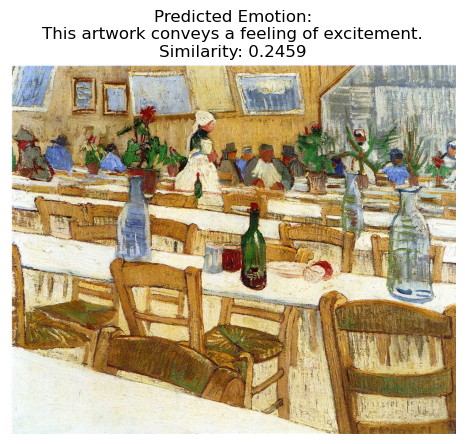

In [4]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image_url = "https://uploads7.wikiart.org/images/vincent-van-gogh/interior-of-a-restaurant-1887.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

emotions = [
    "This artwork conveys a feeling of anger.",
    "This artwork conveys a feeling of disgust.",
    "This artwork conveys a feeling of fear.",
    "This artwork conveys a feeling of sadness.",
    "This artwork conveys a feeling of amusement.",
    "This artwork conveys a feeling of awe.",
    "This artwork conveys a feeling of contentment.",
    "This artwork conveys a feeling of excitement.",
]

inputs = processor(text=emotions, images=img, return_tensors="pt", padding=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

similarities = probs.cpu().numpy()[0]
for i, emotion in enumerate(emotions):
    print(f"Emotion: {emotion}")
    print(f"Similarity: {similarities[i]:.4f}")
    print()

max_idx = similarities.argmax()
predicted_emotion = emotions[max_idx]
print(f"The predicted emotion is: {predicted_emotion}")

def visualize_results(image, emotion, similarity):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    
    plt.title(f"Predicted Emotion:\n{emotion}\nSimilarity: {similarity:.4f}")
    plt.show()

visualize_results(img, predicted_emotion, similarities[max_idx])


Emotion: the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of anger.
Similarity: 0.1499

Emotion: the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of disgust.
Similarity: 0.2393

Emotion: the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of fear.
Similarity: 0.0680

Emotion: the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of sadness.
Similarity: 0.1154

Emotion: the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of amusement.
Similarity: 0.1633

Emotion:

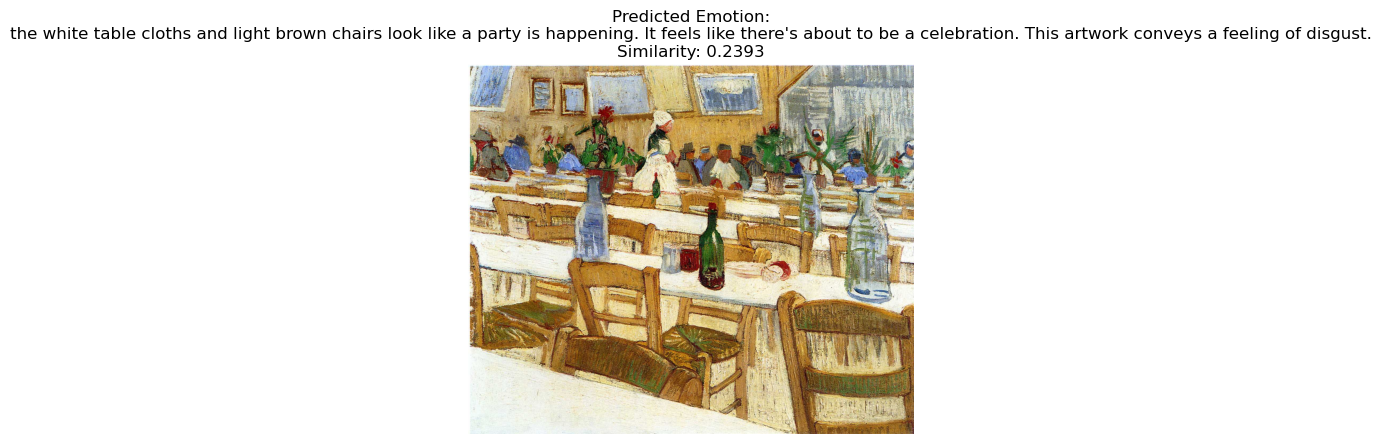

In [1]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image_url = "https://uploads7.wikiart.org/images/vincent-van-gogh/interior-of-a-restaurant-1887.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

emotions = [
    "the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of anger.",
    "the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of disgust.",
    "the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of fear.",
    "the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of sadness.",
    "the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of amusement.",
    "the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of awe.",
    "the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of contentment.",
    "the white table cloths and light brown chairs look like a party is happening. It feels like there's about to be a celebration. This artwork conveys a feeling of excitement.",
]

inputs = processor(text=emotions, images=img, return_tensors="pt", padding=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

similarities = probs.cpu().numpy()[0]
for i, emotion in enumerate(emotions):
    print(f"Emotion: {emotion}")
    print(f"Similarity: {similarities[i]:.4f}")
    print()

max_idx = similarities.argmax()
predicted_emotion = emotions[max_idx]
print(f"The predicted emotion is: {predicted_emotion}")

def visualize_results(image, emotion, similarity):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    
    plt.title(f"Predicted Emotion:\n{emotion}\nSimilarity: {similarity:.4f}")
    plt.show()

visualize_results(img, predicted_emotion, similarities[max_idx])


Emotion: This artwork conveys a feeling of anger.
Similarity: 0.1129

Emotion: This artwork conveys a feeling of disgust.
Similarity: 0.0781

Emotion: This artwork conveys a feeling of fear.
Similarity: 0.1877

Emotion: This artwork conveys a feeling of sadness.
Similarity: 0.0914

Emotion: This artwork conveys a feeling of amusement.
Similarity: 0.0968

Emotion: This artwork conveys a feeling of awe.
Similarity: 0.2103

Emotion: This artwork conveys a feeling of contentment.
Similarity: 0.0907

Emotion: This artwork conveys a feeling of excitement.
Similarity: 0.1320

The predicted emotion is: This artwork conveys a feeling of awe.


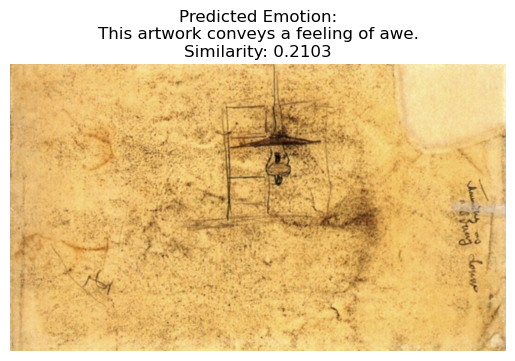

In [6]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image_url = "https://uploads3.wikiart.org/images/vincent-van-gogh/lamp-in-front-of-a-window.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

emotions = [
    "This artwork conveys a feeling of anger.",
    "This artwork conveys a feeling of disgust.",
    "This artwork conveys a feeling of fear.",
    "This artwork conveys a feeling of sadness.",
    "This artwork conveys a feeling of amusement.",
    "This artwork conveys a feeling of awe.",
    "This artwork conveys a feeling of contentment.",
    "This artwork conveys a feeling of excitement.",
]

inputs = processor(text=emotions, images=img, return_tensors="pt", padding=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)  

similarities = probs.cpu().numpy()[0]
for i, emotion in enumerate(emotions):
    print(f"Emotion: {emotion}")
    print(f"Similarity: {similarities[i]:.4f}")
    print()

max_idx = similarities.argmax()
predicted_emotion = emotions[max_idx]
print(f"The predicted emotion is: {predicted_emotion}")

def visualize_results(image, emotion, similarity):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    
    plt.title(f"Predicted Emotion:\n{emotion}\nSimilarity: {similarity:.4f}")
    plt.show()

visualize_results(img, predicted_emotion, similarities[max_idx])


Emotion: The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of anger.
Similarity: 0.1613

Emotion: The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of disgust.
Similarity: 0.1450

Emotion: The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of fear.
Similarity: 0.2045

Emotion: The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of sadness.
Similarity: 0.1581

Emotion: The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is 

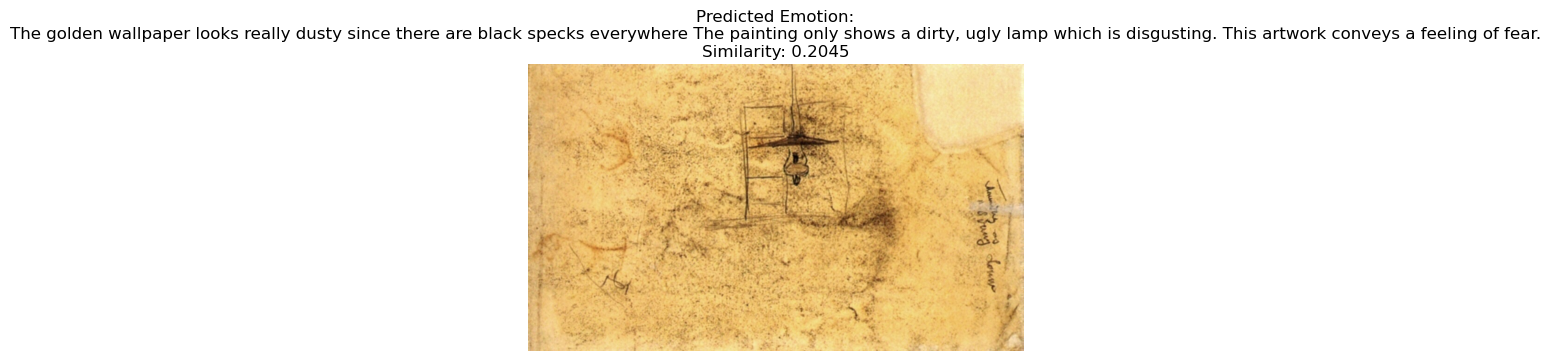

In [7]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image_url = "https://uploads3.wikiart.org/images/vincent-van-gogh/lamp-in-front-of-a-window.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

emotions = [
    "The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of anger.",
    "The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of disgust.",
    "The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of fear.",
    "The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of sadness.",
    "The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of amusement.",
    "The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of awe.",
    "The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of contentment.",
    "The golden wallpaper looks really dusty since there are black specks everywhere The painting only shows a dirty, ugly lamp which is disgusting. This artwork conveys a feeling of excitement.",
]

inputs = processor(text=emotions, images=img, return_tensors="pt", padding=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

similarities = probs.cpu().numpy()[0]
for i, emotion in enumerate(emotions):
    print(f"Emotion: {emotion}")
    print(f"Similarity: {similarities[i]:.4f}")
    print()

max_idx = similarities.argmax()
predicted_emotion = emotions[max_idx]
print(f"The predicted emotion is: {predicted_emotion}")

def visualize_results(image, emotion, similarity):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    
    plt.title(f"Predicted Emotion:\n{emotion}\nSimilarity: {similarity:.4f}")
    plt.show()

visualize_results(img, predicted_emotion, similarities[max_idx])
